In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [257]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
sns.set(style="whitegrid")

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
df = pd.read_csv("grocery_dataset.csv")
df


,item,brand,store_type,season,purchase_method,qty_bought,days_used,daily_use,last_purchase_days_ago,household_size,price,discount_percent,shelf_life_days,rating,stock_status
0,eggs,PremiumSelect,wholesale,monsoon,offline,1.0,32.0,1.408963,34.000000,1.0,175.439407,2.910847,38.000000,4.375990,empty
1,oil,BrandA,online,monsoon,online,3.0,46.0,0.318556,120.208134,1.0,354.412837,13.981288,14.000000,2.455548,low
2,pasta,BrandB,wholesale,none,subscription,7.0,51.0,1.344323,2.000000,3.0,64.493736,0.638923,83.000000,3.454076,empty
3,tea,LocalBrand,local_shop,monsoon,subscription,9.0,18.0,1.457835,39.000000,1.0,126.826177,17.662789,117.000000,3.436221,low
4,NaN,BrandB,online,none,online,1.0,41.0,1.322864,NaN,5.0,391.276512,33.280544,74.000000,3.150208,empty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,coffee,BrandA,local_shop,monsoon,subscription,5.0,58.0,11.627317,9.000000,1.0,140.189846,31.617043,348.316251,3.155766,empty
9996,flour,BrandC,local_shop,summer,online,5.0,29.0,0.776114,2.000000,7.0,465.034872,33.062695,195.000000,2.631374,empty
9997,tea,BrandB,local_shop,monsoon,online,5.0,43.0,1.142398,9.000000,1.0,330.124242,19.599499,24.000000,1.184988,low
9998,tea,BrandC,wholesale,winter,subscription,9.0,57.0,1.205380,6.000000,3.0,98.006319,39.036072,192.000000,22.445802,empty


In [ ]:
df.head()

,item,brand,store_type,season,purchase_method,qty_bought,days_used,daily_use,last_purchase_days_ago,household_size,price,discount_percent,shelf_life_days,rating,stock_status
0,eggs,PremiumSelect,wholesale,monsoon,offline,1.0,32.0,1.408963,34.000000,1.0,175.439407,2.910847,38.0,4.375990,empty
1,oil,BrandA,online,monsoon,online,3.0,46.0,0.318556,120.208134,1.0,354.412837,13.981288,14.0,2.455548,low
2,pasta,BrandB,wholesale,none,subscription,7.0,51.0,1.344323,2.000000,3.0,64.493736,0.638923,83.0,3.454076,empty
3,tea,LocalBrand,local_shop,monsoon,subscription,9.0,18.0,1.457835,39.000000,1.0,126.826177,17.662789,117.0,3.436221,low
4,NaN,BrandB,online,none,online,1.0,41.0,1.322864,NaN,5.0,391.276512,33.280544,74.0,3.150208,empty


In [ ]:
df.tail()

,item,brand,store_type,season,purchase_method,qty_bought,days_used,daily_use,last_purchase_days_ago,household_size,price,discount_percent,shelf_life_days,rating,stock_status
9995,coffee,BrandA,local_shop,monsoon,subscription,5.0,58.0,11.627317,9.0,1.0,140.189846,31.617043,348.316251,3.155766,empty
9996,flour,BrandC,local_shop,summer,online,5.0,29.0,0.776114,2.0,7.0,465.034872,33.062695,195.000000,2.631374,empty
9997,tea,BrandB,local_shop,monsoon,online,5.0,43.0,1.142398,9.0,1.0,330.124242,19.599499,24.000000,1.184988,low
9998,tea,BrandC,wholesale,winter,subscription,9.0,57.0,1.205380,6.0,3.0,98.006319,39.036072,192.000000,22.445802,empty
9999,coffee,LocalBrand,online,none,online,7.0,52.0,1.422258,19.0,6.0,329.324762,31.990790,113.000000,4.738881,empty


In [ ]:
df.shape

(10000, 15)

In [ ]:
df.columns

Index(['item', 'brand', 'store_type', 'season', 'purchase_method',
       'qty_bought', 'days_used', 'daily_use', 'last_purchase_days_ago',
       'household_size', 'price', 'discount_percent', 'shelf_life_days',
       'rating', 'stock_status'],
      dtype='object')

In [ ]:
df.isna().sum()

item                      212
brand                     200
store_type                194
season                    190
purchase_method           198
qty_bought                195
days_used                 200
daily_use                 188
last_purchase_days_ago    213
household_size            217
price                     225
discount_percent          190
shelf_life_days           165
rating                    216
stock_status                0
dtype: int64

In [ ]:
# -------------------------------
# 2. Handle Missing Values
# -------------------------------
# Fill numeric NaN with mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical NaN with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isna().sum()

item                      0
brand                     0
store_type                0
season                    0
purchase_method           0
qty_bought                0
days_used                 0
daily_use                 0
last_purchase_days_ago    0
household_size            0
price                     0
discount_percent          0
shelf_life_days           0
rating                    0
stock_status              0
dtype: int64

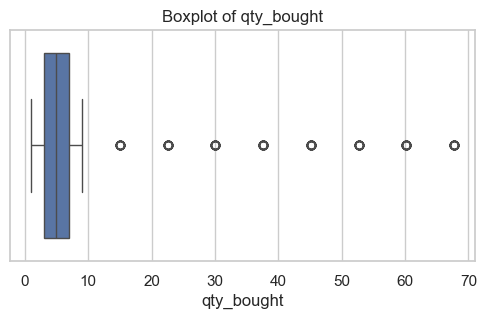

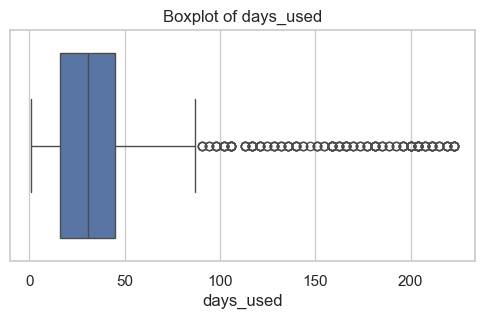

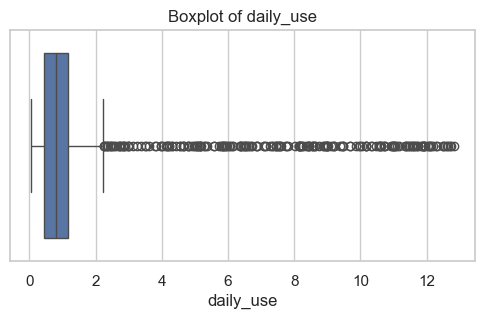

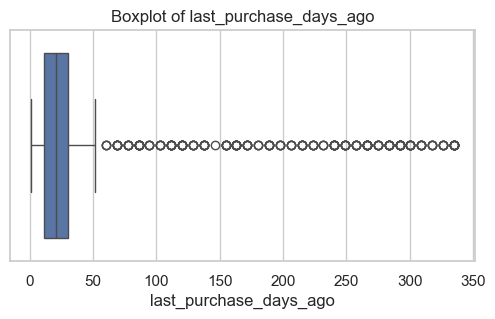

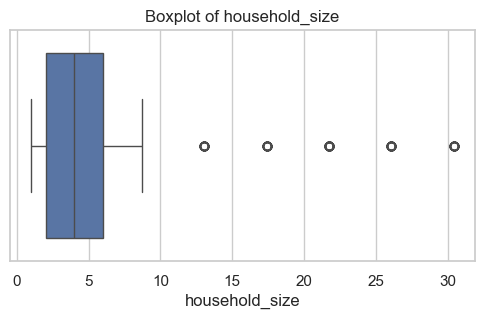

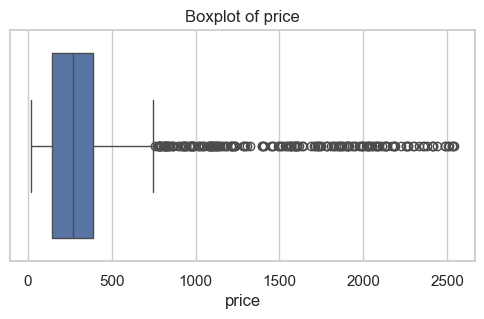

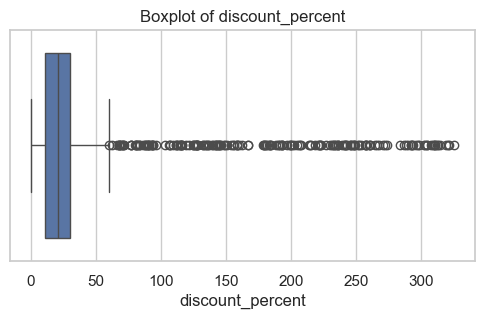

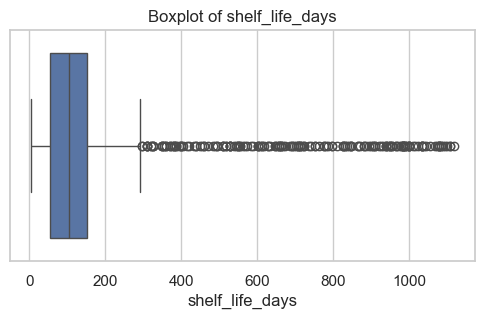

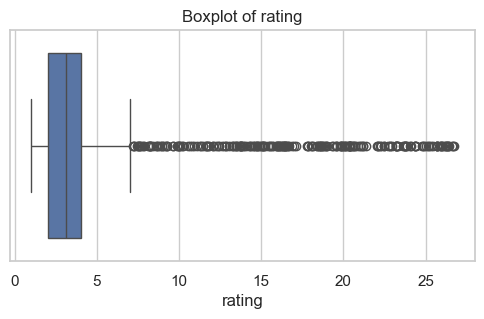

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
# -------------------------------
# 4. REMOVE OUTLIERS USING IQR
# -------------------------------
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (8364, 15)


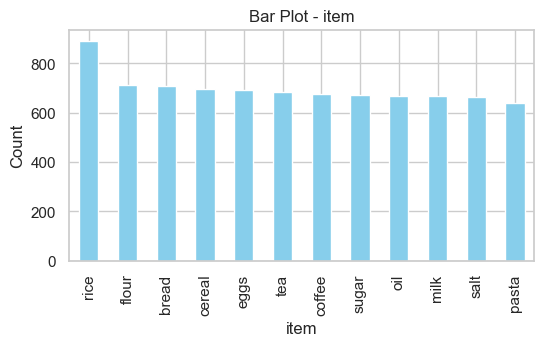

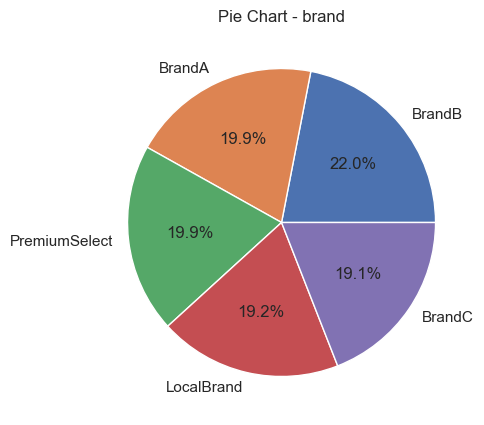

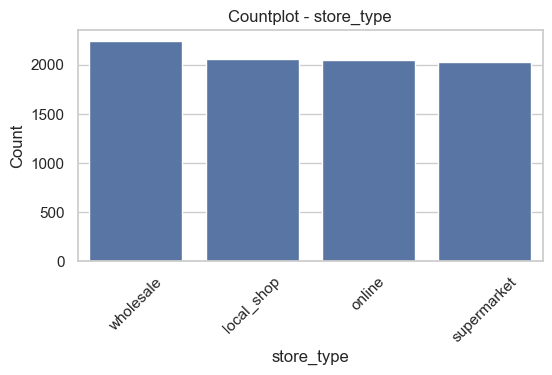

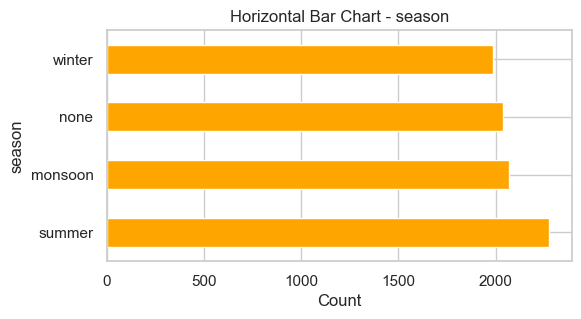

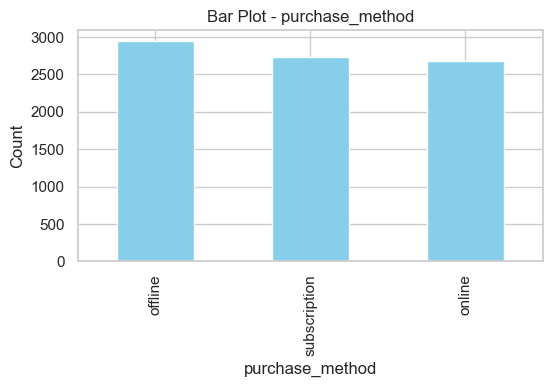

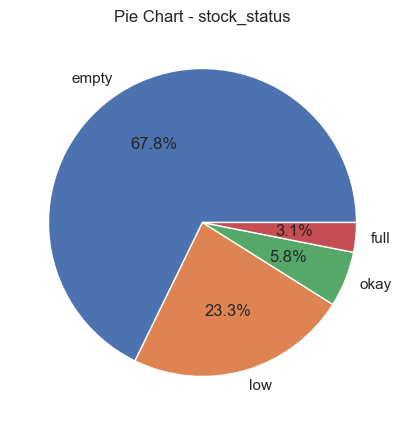

In [ ]:
# -------------------------------
# DIFFERENT GRAPH FOR EACH CATEGORICAL COLUMN
# -------------------------------

plot_types = ["bar", "pie", "countplot", "barh"]  
# If you have more categorical columns than plot types, it will repeat safely

plot_index = 0

for col in categorical_cols:
    plot_type = plot_types[plot_index % len(plot_types)]
    
    if plot_type == "bar":
        plt.figure(figsize=(6,3))
        df[col].value_counts().plot(kind="bar", color="skyblue")
        plt.title(f"Bar Plot - {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

    elif plot_type == "pie":
        plt.figure(figsize=(5,5))
        df[col].value_counts().plot(kind="pie", autopct="%1.1f%%")
        plt.title(f"Pie Chart - {col}")
        plt.legend
        plt.tight_layout
        plt.ylabel("")
        plt.show()

    elif plot_type == "countplot":
        plt.figure(figsize=(6,3))
        sns.countplot(x=df[col])
        plt.title(f"Countplot - {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

    elif plot_type == "barh":
        plt.figure(figsize=(6,3))
        df[col].value_counts().plot(kind="barh", color="orange")
        plt.title(f"Horizontal Bar Chart - {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

    plot_index += 1

In [ ]:
# ----------------------------------------------------
# 6. Encode Categorical Columns
# ----------------------------------------------------
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ----------------------------------------------------
# Encode TARGET column
# ----------------------------------------------------
target = df.columns[-1]   # last column is output
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])


In [ ]:
# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Scaling function
# -----------------------------
def scale_data(train, test):
    scaler = StandardScaler()
    return scaler.fit_transform(train), scaler.transform(test), scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)


# -----------------------------
# Apply scaling (NOW x_train is defined)
# -----------------------------
x_train, x_test, scaler = scale_data(X_train, X_test)


In [ ]:
# -------------------------------
# Train SVM Model
# -------------------------------
model = SVC(kernel='rbf', gamma='scale', C=1.0, class_weight='balanced')
model.fit(x_train, y_train)
from imblearn.over_sampling import SMOTE

model = SVC(kernel='rbf', gamma='scale', C=1.0)
model.fit(X_res, y_res)

print("Before:", y.value_counts())
print("After:", pd.Series(y_res).value_counts())




ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# prediction
y_pred = model.predict(x_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.8798565451285116
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1127
           1       0.65      0.71      0.68        51
           2       0.76      0.87      0.81       408
           3       0.46      0.63      0.53        87

    accuracy                           0.88      1673
   macro avg       0.72      0.78      0.74      1673
weighted avg       0.90      0.88      0.89      1673

[[1027    0   98    2]
 [   0   36    0   15]
 [   6    0  354   48]
 [   0   19   13   55]]


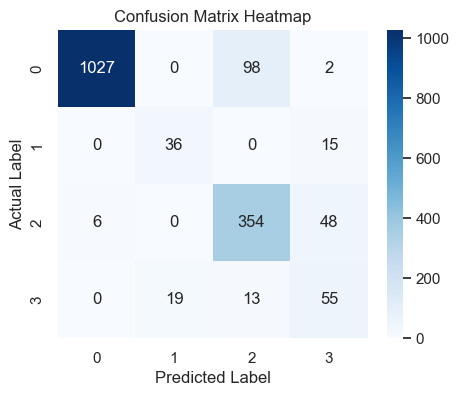

In [ ]:
# -------------------------------
# Heatmap of Confusion Matrix
# -------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
print("ITEM:", df['item'].unique())
print("BRAND:", df['brand'].unique())
print("STORE TYPE:", df['store_type'].unique())
print("SEASON:", df['season'].unique())
print("PURCHASE METHOD:", df['purchase_method'].unique())


ITEM: [ 3  7 11  8  4  9  5  6  0 10  1  2]
BRAND: [4 1 3 2 0]
STORE TYPE: [3 0 1 2]
SEASON: [0 1 2 3]
PURCHASE METHOD: [0 2 1]


In [ ]:
# ----------------------------------------------------
# 13. Predict a New Item (Your Custom Input)
# ----------------------------------------------------
new_item = pd.DataFrame({
    "qty_bought": [4],
    "days_used": [2],
    "daily_use": [1],
    "last_purchase_days_ago": [3],
    "household_size": [4],
    "price": [50],
    "discount_percent": [10],
    "shelf_life_days": [30],
    "rating": [4],

    # USE ONLY EXISTING INTEGER LABELS (NO STRINGS)
    "item": [3],               # valid item ID
    "brand": [1],              # valid brand ID
    "store_type": [2],         # valid store type ID
    "season": [1],             # valid season ID
    "purchase_method": [2]     # valid method ID
})

# Ensure same column order
new_item = new_item[X.columns]

# Scale
new_scaled = scaler.transform(new_item)

# Predict encoded class
pred_encoded = model.predict(new_scaled)

# Decode to original class using target encoder
prediction = target_encoder.inverse_transform(pred_encoded)

print("\nPredicted Stock Status:", prediction[0])



Predicted Stock Status: 0


In [ ]:
# ----------------------------------------------------
# 14. Save Model + Scaler + Encoders
# ----------------------------------------------------
joblib.dump(model, "svm_grocery_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(target_encoder, "target_encoder.pkl")

print("\nModel Saved Successfully.")


Model Saved Successfully.


In [ ]:
print(df[target].value_counts())


stock_status
0    5669
2    1948
3     487
1     260
Name: count, dtype: int64


In [ ]:
df[target].value_counts(normalize=True)


stock_status
0    0.677786
2    0.232903
3    0.058226
1    0.031086
Name: proportion, dtype: float64

In [258]:
import sys
print(sys.executable)


c:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe
